In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc

In [29]:
path = "/Users/younyung.gene/__DSL__/EDA/DATA/merged.csv"
df = pd.read_csv(path, encoding = "utf-8")
plt.rcParams['font.family'] = 'AppleGothic'

Text(0.5, 1.0, '남성 인구 10~14세 주상병코드 분포')

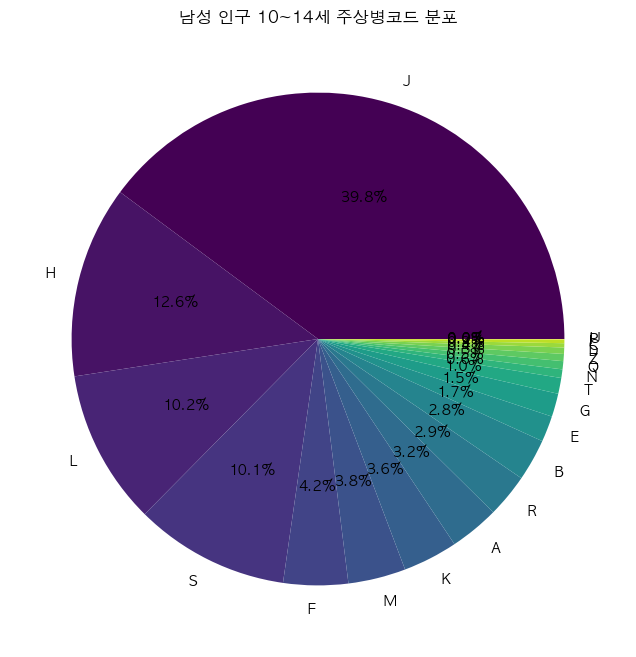

In [63]:
df_m = df.query("성별코드 == 1")
df_m = df_m.query("연령대코드 == 3")
df_m = pd.DataFrame(df_m["주상병코드"])

df_m["주상병코드"] = df_m["주상병코드"].str.slice(0,1)

count = df_m["주상병코드"].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(count)))
plt.figure(figsize=(8,8))
plt.pie(count, autopct='%1.1f%%', labels=count.index, colors=colors)
plt.title("남성 인구 10~14세 주상병코드 분포")

Text(0.5, 1.0, '여성 인구 10~14세 주상병코드 분포')

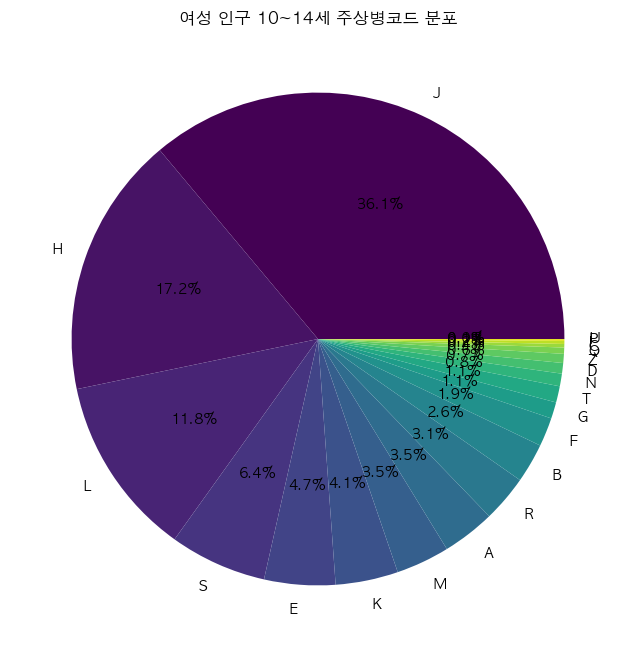

In [62]:
df_w = df.query("성별코드 == 2")
df_w = df_w.query("연령대코드 == 3")
df_w = pd.DataFrame(df_w["주상병코드"])

df_w["주상병코드"] = df_w["주상병코드"].str.slice(0,1)

count = df_w["주상병코드"].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(count)))
plt.figure(figsize=(8,8))
plt.pie(count, autopct='%1.1f%%', labels=count.index, colors=colors)
plt.title("여성 인구 10~14세 주상병코드 분포")

Text(0.5, 1.0, '여성 인구 연령대별 분포')

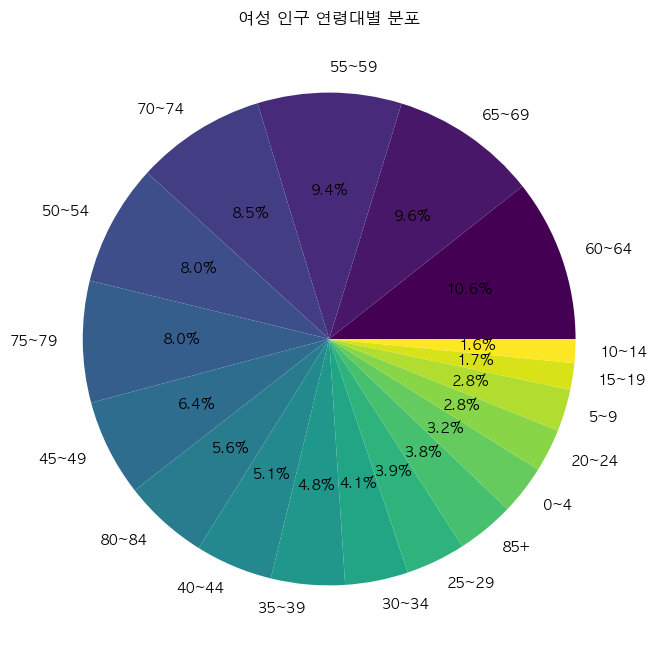

In [49]:
df_age_w = df.query("성별코드 == 2")
df_age_w = pd.DataFrame(df_age_w["연령대코드"])

df_age_w["연령대코드"] = df_age_w["연령대코드"].replace(
    {1 : "0~4"
    ,2 : "5~9"
    ,3 : "10~14"
    ,4 : "15~19"
    ,5 : "20~24"
    ,6 : "25~29"
    ,7 : "30~34"
    ,8 : "35~39"
    ,9 : "40~44"
    ,10 : "45~49"
    ,11 : "50~54"
    ,12 : "55~59"
    ,13 : "60~64"
    ,14 : "65~69"
    ,15 : "70~74"
    ,16 : "75~79"
    ,17 : "80~84"
    ,18 : "85+"})

count = df_age_w["연령대코드"].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(count)))
plt.figure(figsize=(8,8))
plt.pie(count, autopct='%1.1f%%', labels=count.index, colors=colors)
plt.title("여성 인구 연령대별 분포")

In [28]:
#["주상병코드"] 데이터 대분류로 축소
df["주상병코드_"] = df["주상병코드"].str.slice(0,1)

#주상병코드 J만 남기기
df_J = df.loc[df["주상병코드_"]=="J"]

#데이터 확인
df_J

NameError: name 'df' is not defined

In [5]:
#memory free
del df
gc.collect()

0

In [6]:
J_count = df_J["주상병코드"].value_counts()

J_count

J209     563250
J304     139841
J0390     95396
J029      93272
J00       82181
          ...  
J21           2
J012          2
J156          2
J31           1
J34           1
Name: 주상병코드, Length: 257, dtype: int64

In [7]:
age = df_J.groupby("연령대코드").mean()
age

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,시도코드,서식코드,진료과목코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
연령대코드,,,,,,,,,,,,,,
1,2020.0,613155.615339,5.383431e+06,1.462048,35.387979,2.991898,8.943549,1.029420,1.074381,0.162595,22194.948092,3800.237324,18393.986053,3.766683
2,2020.0,609411.116759,5.098452e+06,1.460330,34.901942,2.996276,8.690273,1.019356,1.053079,0.159300,20781.798929,5073.800005,15706.472207,4.231416
3,2020.0,612807.062429,5.019639e+06,1.421715,34.937525,2.998093,8.320036,1.018903,1.057261,0.156736,22724.182503,6237.743872,16484.688191,4.366880
4,2020.0,613887.065641,5.273608e+06,1.473432,34.029552,3.002406,7.554458,1.020324,1.068522,0.156400,28454.140589,8190.118556,20263.511563,4.240024
5,2020.0,610219.411221,4.931913e+06,1.553469,32.949383,2.998165,7.673433,1.020432,1.079860,0.157262,33174.019473,9795.712892,23378.269387,4.305192
6,2020.0,609544.526352,4.813503e+06,1.568039,31.697253,3.001169,7.880419,1.013838,1.082421,0.157263,30933.250756,9345.542688,21586.812655,4.309962
7,2020.0,614358.102846,4.844115e+06,1.605052,32.607576,3.000858,8.097061,1.010687,1.080223,0.156428,28537.171622,8556.831785,19979.307949,4.426236
8,2020.0,609503.955635,4.811096e+06,1.612338,33.101987,3.002978,8.143952,1.011028,1.088748,0.155857,26313.750271,7906.246932,18406.003447,4.561494
9,2020.0,614699.587775,4.782821e+06,1.608674,33.552527,3.001813,7.843546,1.012402,1.090705,0.155795,26833.470329,8041.025791,18777.531100,4.989210


Text(0.5, 1.0, '연령대별 평균 입내원일수')

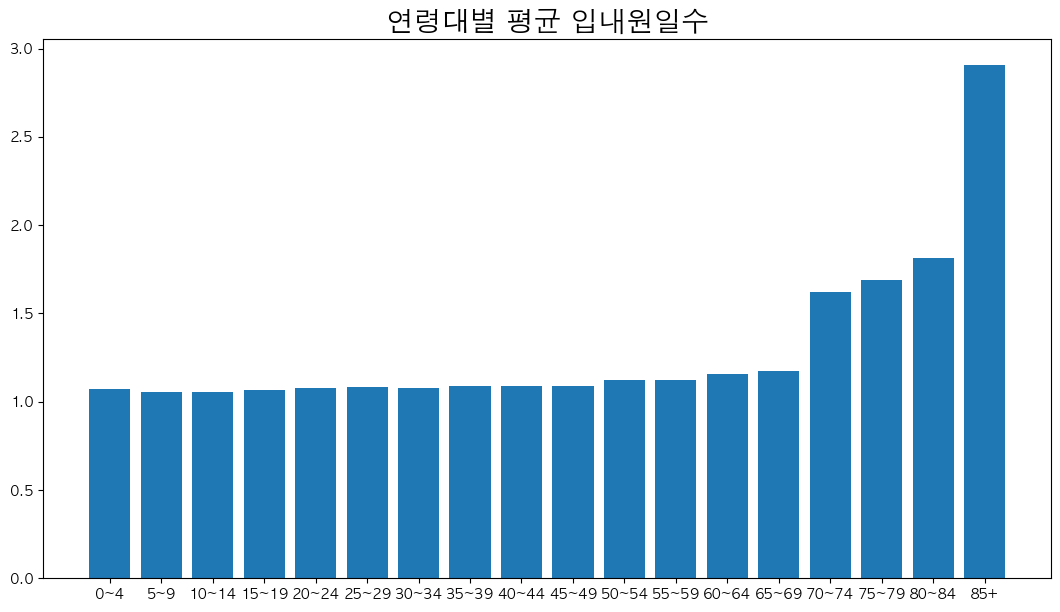

In [8]:
#입내원일수 barplot
data = df_J[["입내원일수", "연령대코드"]]
data = data.groupby("연령대코드").mean()
data.reset_index()
data["연령대코드"] = data.index


#전처리
data["연령대코드"] = data["연령대코드"].replace(
    {1 : "0~4"
    ,2 : "5~9"
    ,3 : "10~14"
    ,4 : "15~19"
    ,5 : "20~24"
    ,6 : "25~29"
    ,7 : "30~34"
    ,8 : "35~39"
    ,9 : "40~44"
    ,10 : "45~49"
    ,11 : "50~54"
    ,12 : "55~59"
    ,13 : "60~64"
    ,14 : "65~69"
    ,15 : "70~74"
    ,16 : "75~79"
    ,17 : "80~84"
    ,18 : "85+"})

plt.figure(figsize=(13,7))
plt.bar(data["연령대코드"], data["입내원일수"])
plt.title("연령대별 평균 입내원일수", fontsize=20)

Text(0.5, 1.0, '연령대별 평균 심결요양급여비용총액')

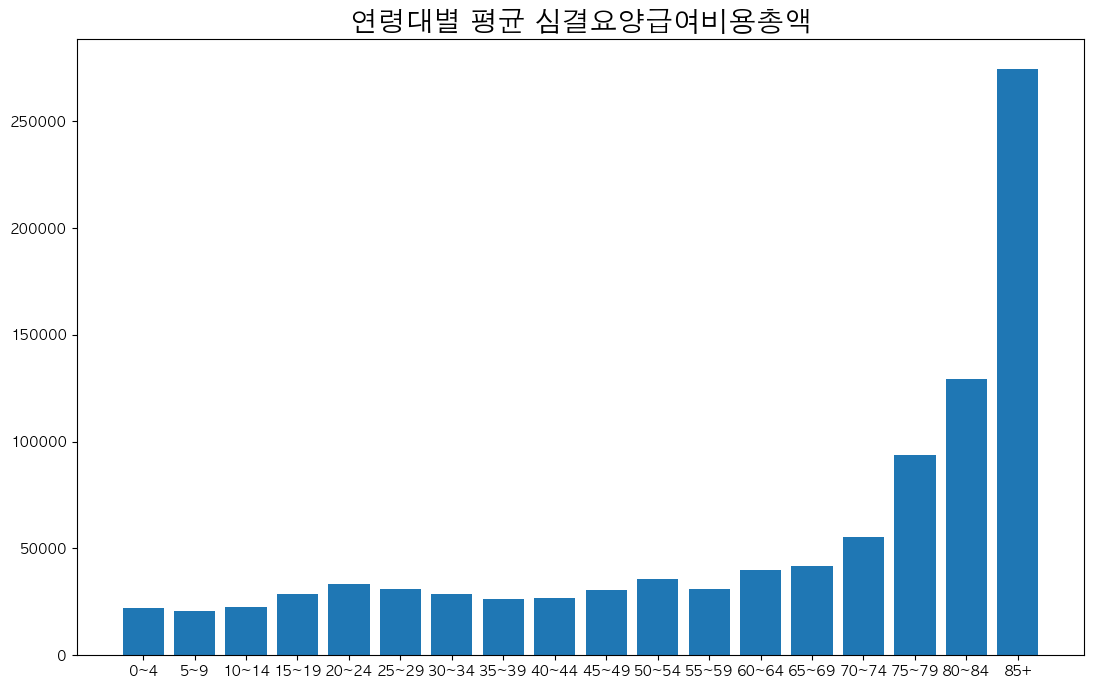

In [9]:
#심결요양급여비용총액 barplot
data = df_J[["심결요양급여비용총액", "연령대코드"]]
data = data.groupby("연령대코드").mean()
data.reset_index()
data["연령대코드"] = data.index


#전처리
data["연령대코드"] = data["연령대코드"].replace(
    {1 : "0~4"
    ,2 : "5~9"
    ,3 : "10~14"
    ,4 : "15~19"
    ,5 : "20~24"
    ,6 : "25~29"
    ,7 : "30~34"
    ,8 : "35~39"
    ,9 : "40~44"
    ,10 : "45~49"
    ,11 : "50~54"
    ,12 : "55~59"
    ,13 : "60~64"
    ,14 : "65~69"
    ,15 : "70~74"
    ,16 : "75~79"
    ,17 : "80~84"
    ,18 : "85+"})

plt.figure(figsize=(13,8))
plt.bar(data["연령대코드"], data["심결요양급여비용총액"])
plt.title("연령대별 평균 심결요양급여비용총액", fontsize=20)

Text(0.5, 1.0, '연령대별 평균 심결본인부담금')

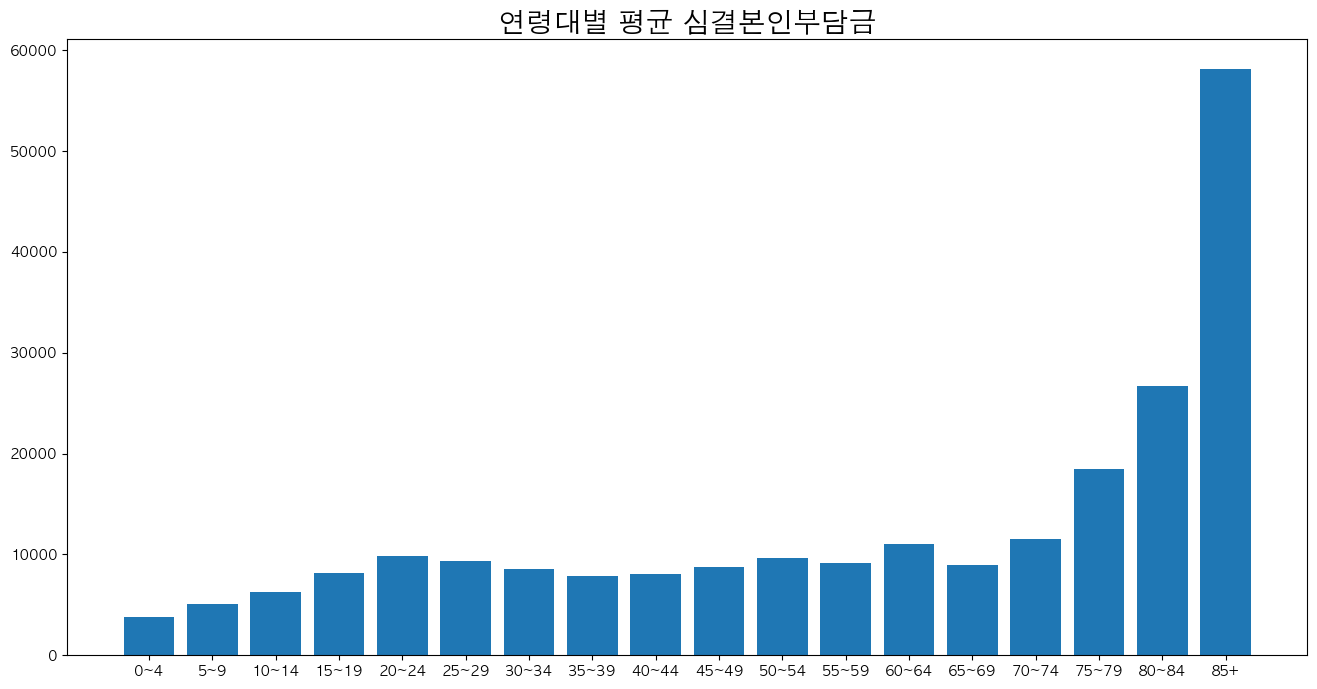

In [10]:
#심결본인부담금 barplot
data = df_J[["심결본인부담금", "연령대코드"]]
data = data.groupby("연령대코드").mean()
data.reset_index()
data["연령대코드"] = data.index


#전처리
data["연령대코드"] = data["연령대코드"].replace(
    {1 : "0~4"
    ,2 : "5~9"
    ,3 : "10~14"
    ,4 : "15~19"
    ,5 : "20~24"
    ,6 : "25~29"
    ,7 : "30~34"
    ,8 : "35~39"
    ,9 : "40~44"
    ,10 : "45~49"
    ,11 : "50~54"
    ,12 : "55~59"
    ,13 : "60~64"
    ,14 : "65~69"
    ,15 : "70~74"
    ,16 : "75~79"
    ,17 : "80~84"
    ,18 : "85+"})

plt.figure(figsize=(16,8))
plt.bar(data["연령대코드"], data["심결본인부담금"])
plt.title("연령대별 평균 심결본인부담금", fontsize=20)


In [11]:
#고령층 분석
df_elderly = df_J.loc[df_J["연령대코드"]==18]
elderly_J = df_J["주상병코드"].value_counts()
elderly_J

J209     563250
J304     139841
J0390     95396
J029      93272
J00       82181
          ...  
J21           2
J012          2
J156          2
J31           1
J34           1
Name: 주상병코드, Length: 257, dtype: int64

Text(0.5, 1.0, '여성 주상병코드별 평균 심결요양급여비용총액')

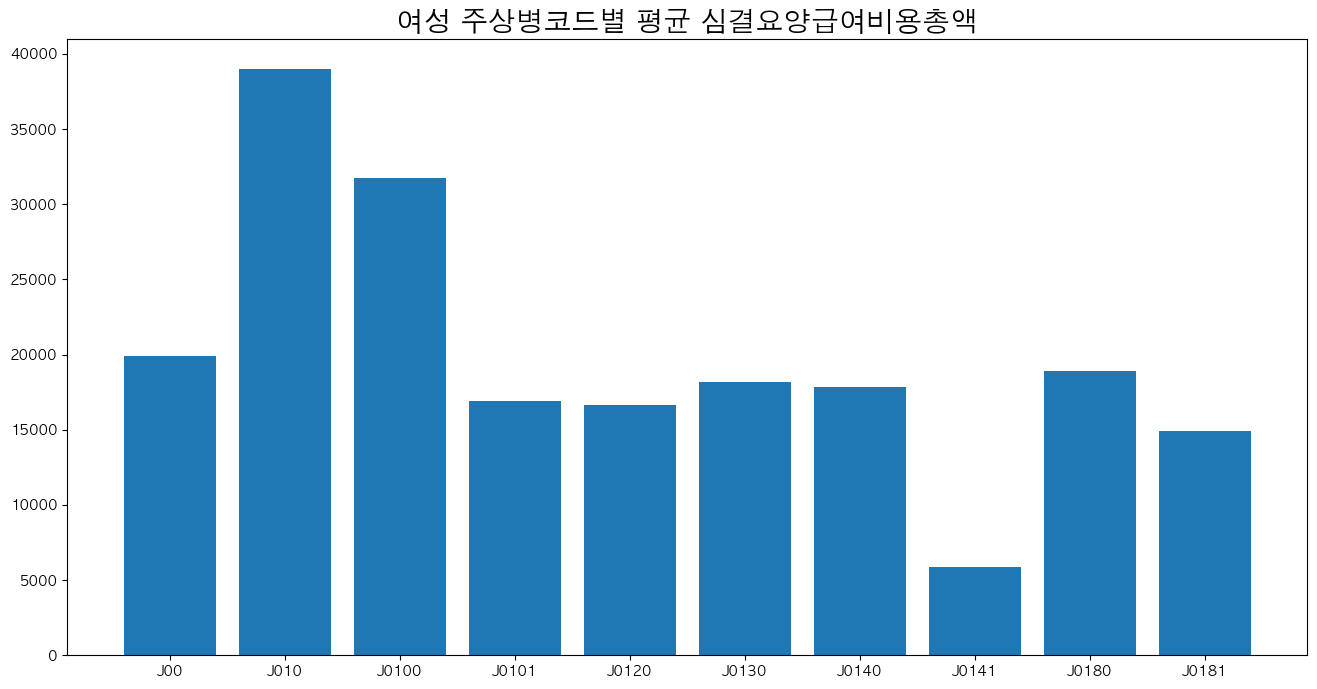

In [12]:
#어린이 질병별 심결요양급여비용총액
data = df_elderly[["심결요양급여비용총액", "주상병코드"]]
data = data.groupby("주상병코드").mean()
data.reset_index()
data["주상병코드"] = data.index

data.sort_values(by=["심결요양급여비용총액"])
data = data.head(10)

plt.figure(figsize=(16,8))
plt.bar(data["주상병코드"], data["심결요양급여비용총액"])
plt.title("여성 주상병코드별 평균 심결요양급여비용총액", fontsize=20)

In [13]:
df_women = df_J.loc[df_J["성별코드"]==2]
df_men = df_J.loc[df_J["성별코드"]==1]

Text(0.5, 1.0, '여성 호흡계통 질환 연령대별 분포')

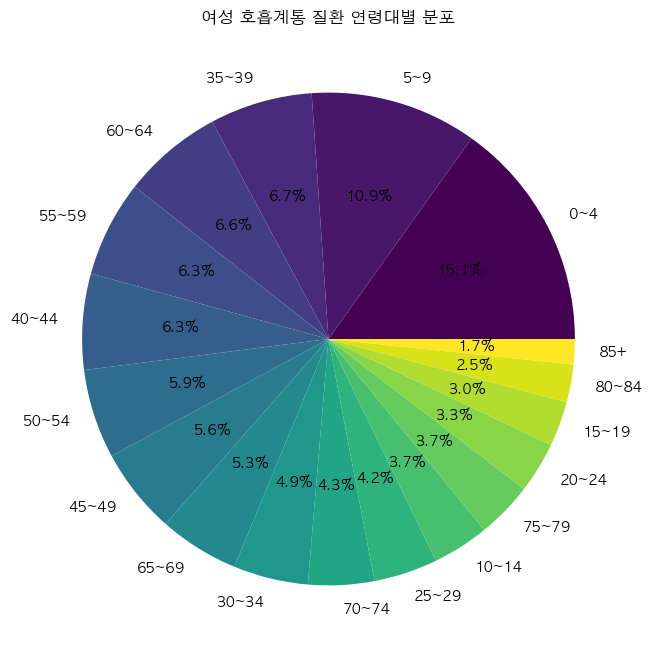

In [27]:
data = pd.DataFrame()
data["연령대코드"] = df_women["연령대코드"]

#전처리
data["연령대코드"] = data["연령대코드"].replace(
    {1 : "0~4"
    ,2 : "5~9"
    ,3 : "10~14"
    ,4 : "15~19"
    ,5 : "20~24"
    ,6 : "25~29"
    ,7 : "30~34"
    ,8 : "35~39"
    ,9 : "40~44"
    ,10 : "45~49"
    ,11 : "50~54"
    ,12 : "55~59"
    ,13 : "60~64"
    ,14 : "65~69"
    ,15 : "70~74"
    ,16 : "75~79"
    ,17 : "80~84"
    ,18 : "85+"})

count = data["연령대코드"].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(count)))
plt.figure(figsize=(8,8))
plt.pie(count, autopct='%1.1f%%', labels=count.index, colors=colors)
plt.title("여성 호흡계통 질환 연령대별 분포")


Text(0.5, 1.0, '남성 호흡계통질환 연령대별 분포')

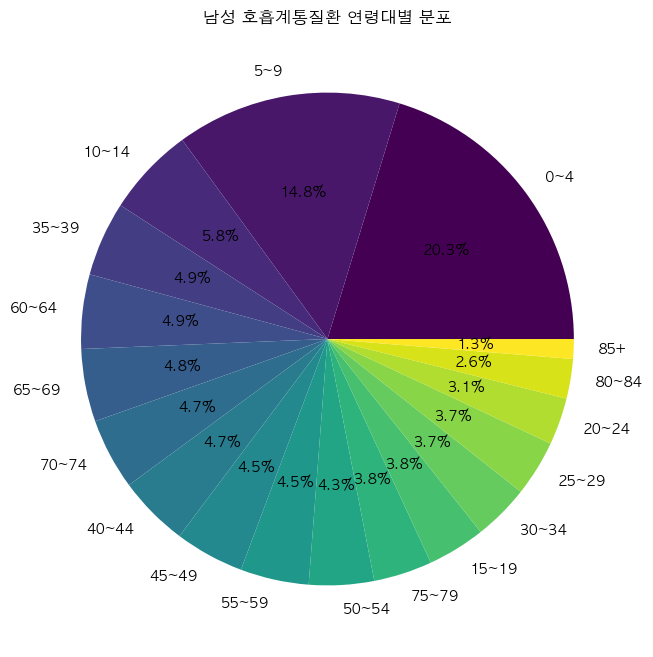

In [24]:
data = pd.DataFrame()
data["연령대코드"] = df_men["연령대코드"]

#전처리
data["연령대코드"] = data["연령대코드"].replace(
    {1 : "0~4"
    ,2 : "5~9"
    ,3 : "10~14"
    ,4 : "15~19"
    ,5 : "20~24"
    ,6 : "25~29"
    ,7 : "30~34"
    ,8 : "35~39"
    ,9 : "40~44"
    ,10 : "45~49"
    ,11 : "50~54"
    ,12 : "55~59"
    ,13 : "60~64"
    ,14 : "65~69"
    ,15 : "70~74"
    ,16 : "75~79"
    ,17 : "80~84"
    ,18 : "85+"})

count = data["연령대코드"].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(count)))
plt.figure(figsize=(8,8))
plt.pie(count, autopct='%1.1f%%', labels=count.index, colors=colors)
plt.title("남성 호흡계통질환 연령대별 분포")